# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
313943,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0122,0.0952,0.0024,0.0488,0,0,0,0
380714,0.0024,0.0024,0.0049,0.0024,0.0024,0.0024,0.0269,0.0464,0.1172,0.0049,9,0,14,0
38663,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.2100,0.1074,0.0024,0.0488,0,0,0,0
373947,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.0122,0.0830,0.0024,1,0,14,0
325473,0.0024,0.0024,0.0073,0.0024,0.0024,0.0024,0.0024,0.0049,0.0098,0.0391,4,0,9,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.273175,-0.420358,-0.402043,-0.277718,-0.355235,-0.163107,-0.495774,-0.564693,-0.498765,-0.275575
1,-0.304453,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.583680,-0.498765,-0.305083
2,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.589922,-0.498765,-0.334591
3,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.602667,-0.498765,-0.378552
4,-0.335731,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.596424,-0.498765,-0.393607
...,...,...,...,...,...,...,...,...,...,...
378530,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.545445,-0.007433,-0.467075
378531,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.558190,0.012680,-0.467075
378532,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.558190,0.012680,-0.467075
378533,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.564693,0.022532,-0.467075


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
from keras.models import Sequential    
model = Sequential()


model.add(Dense(48, input_dim=input_dim, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(96, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(192, activation='relu'))
model.add(BatchNormalization())


model.add(Dense(24, activation='softmax'))


model.add(Dense(192, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(96, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(48, activation='relu'))
model.add(BatchNormalization())


model.add(Dense(num_classes, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                528       
                                                                 
 batch_normalization (BatchN  (None, 48)               192       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 96)                4704      
                                                                 
 batch_normalization_1 (Batc  (None, 96)               384       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 192)               18624     
                                                                 
 batch_normalization_2 (Batc  (None, 192)              7

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=200, validation_data = (X_test, y_test))

Epoch 1/200
75/75 [==============================] - 3s 11ms/step - loss: 1.5748 - accuracy: 0.6115 - val_loss: 2.4633 - val_accuracy: 0.5284
Epoch 2/200
75/75 [==============================] - 1s 8ms/step - loss: 1.0414 - accuracy: 0.7312 - val_loss: 2.1384 - val_accuracy: 0.5284
Epoch 3/200
75/75 [==============================] - 1s 8ms/step - loss: 0.8649 - accuracy: 0.7716 - val_loss: 2.0684 - val_accuracy: 0.5286
Epoch 4/200
75/75 [==============================] - 1s 8ms/step - loss: 0.7715 - accuracy: 0.7923 - val_loss: 1.9596 - val_accuracy: 0.5345
Epoch 5/200
75/75 [==============================] - 1s 8ms/step - loss: 0.7104 - accuracy: 0.8061 - val_loss: 1.7025 - val_accuracy: 0.5706
Epoch 6/200
75/75 [==============================] - 1s 8ms/step - loss: 0.6659 - accuracy: 0.8165 - val_loss: 1.3903 - val_accuracy: 0.6274
Epoch 7/200
75/75 [==============================] - 1s 8ms/step - loss: 0.6323 - accuracy: 0.8242 - val_loss: 1.0695 - val_accuracy: 0.7065
Epoch 8/200


Epoch 59/200
75/75 [==============================] - 1s 8ms/step - loss: 0.3378 - accuracy: 0.9013 - val_loss: 0.4140 - val_accuracy: 0.8826
Epoch 60/200
75/75 [==============================] - 1s 8ms/step - loss: 0.3364 - accuracy: 0.9018 - val_loss: 0.4120 - val_accuracy: 0.8840
Epoch 61/200
75/75 [==============================] - 1s 8ms/step - loss: 0.3366 - accuracy: 0.9012 - val_loss: 0.4067 - val_accuracy: 0.8849
Epoch 62/200
75/75 [==============================] - 1s 8ms/step - loss: 0.3321 - accuracy: 0.9028 - val_loss: 0.4066 - val_accuracy: 0.8845
Epoch 63/200
75/75 [==============================] - 1s 8ms/step - loss: 0.3344 - accuracy: 0.9020 - val_loss: 0.4044 - val_accuracy: 0.8849
Epoch 64/200
75/75 [==============================] - 1s 8ms/step - loss: 0.3324 - accuracy: 0.9025 - val_loss: 0.4074 - val_accuracy: 0.8835
Epoch 65/200
75/75 [==============================] - 1s 8ms/step - loss: 0.3319 - accuracy: 0.9032 - val_loss: 0.4062 - val_accuracy: 0.8859
Epoch 

75/75 [==============================] - 1s 8ms/step - loss: 0.2816 - accuracy: 0.9182 - val_loss: 0.3767 - val_accuracy: 0.8946
Epoch 117/200
75/75 [==============================] - 1s 8ms/step - loss: 0.2780 - accuracy: 0.9191 - val_loss: 0.3678 - val_accuracy: 0.8959
Epoch 118/200
75/75 [==============================] - 1s 8ms/step - loss: 0.2808 - accuracy: 0.9183 - val_loss: 0.3665 - val_accuracy: 0.8978
Epoch 119/200
75/75 [==============================] - 1s 8ms/step - loss: 0.2777 - accuracy: 0.9191 - val_loss: 0.3697 - val_accuracy: 0.8971
Epoch 120/200
75/75 [==============================] - 1s 8ms/step - loss: 0.2767 - accuracy: 0.9196 - val_loss: 0.3606 - val_accuracy: 0.8983
Epoch 121/200
75/75 [==============================] - 1s 8ms/step - loss: 0.2736 - accuracy: 0.9204 - val_loss: 0.3942 - val_accuracy: 0.8932
Epoch 122/200
75/75 [==============================] - 1s 8ms/step - loss: 0.2798 - accuracy: 0.9188 - val_loss: 0.3675 - val_accuracy: 0.8975
Epoch 123/200

75/75 [==============================] - 1s 8ms/step - loss: 0.2546 - accuracy: 0.9260 - val_loss: 0.3600 - val_accuracy: 0.9024
Epoch 174/200
75/75 [==============================] - 1s 8ms/step - loss: 0.2543 - accuracy: 0.9263 - val_loss: 0.3526 - val_accuracy: 0.9010
Epoch 175/200
75/75 [==============================] - 1s 8ms/step - loss: 0.2520 - accuracy: 0.9267 - val_loss: 0.3512 - val_accuracy: 0.9033
Epoch 176/200
75/75 [==============================] - 1s 8ms/step - loss: 0.2507 - accuracy: 0.9275 - val_loss: 0.3472 - val_accuracy: 0.9031
Epoch 177/200
75/75 [==============================] - 1s 8ms/step - loss: 0.2501 - accuracy: 0.9275 - val_loss: 0.3773 - val_accuracy: 0.8987
Epoch 178/200
75/75 [==============================] - 1s 8ms/step - loss: 0.2504 - accuracy: 0.9280 - val_loss: 0.3470 - val_accuracy: 0.9036
Epoch 179/200
75/75 [==============================] - 1s 8ms/step - loss: 0.2488 - accuracy: 0.9280 - val_loss: 0.3510 - val_accuracy: 0.9024
Epoch 180/200

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

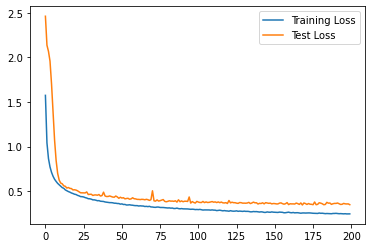

In [24]:
#Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = "Test Loss")
plt.legend()
plt.show()

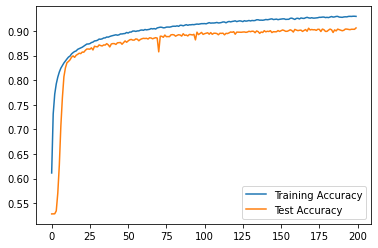

In [25]:
#accuracy Curve
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = "Test Accuracy")
plt.legend()
plt.show()

## 4.2 Evaluation

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)

2366/2366 [==============================] - 5s 2ms/step - loss: 0.3471 - accuracy: 0.9060


##  4.3 Make Predictions

In [27]:
predictions = model.predict(X_test)

In [28]:
predictions

array([[9.9722302e-01, 5.2048022e-06, 7.6227222e-04, ..., 8.1538758e-08,
        5.8626416e-08, 5.5952199e-07],
       [8.9352396e-15, 1.1071333e-09, 4.2660583e-18, ..., 1.2395338e-08,
        1.4978834e-08, 2.2969914e-05],
       [9.3918198e-01, 4.5768232e-03, 4.8911413e-03, ..., 3.8002022e-06,
        4.8292040e-05, 2.2427760e-06],
       ...,
       [6.2086731e-03, 3.0960196e-05, 1.2569953e-07, ..., 8.9303037e-10,
        2.2562835e-08, 2.2459441e-12],
       [9.8862213e-01, 1.3487826e-03, 5.0786249e-03, ..., 1.0041124e-05,
        3.3236560e-05, 1.8059818e-06],
       [7.6659540e-05, 2.3876812e-06, 2.4686719e-06, ..., 1.5373917e-10,
        2.6251030e-07, 5.6712600e-11]], dtype=float32)